## Full Example of Decision Tree Classification


# 1. Import Libraries


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Dataset


In [8]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for 2D plotting
y = iris.target

# 3. Split Dataset into Training and Testing


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Feature Scaling


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train the Decision Tree Model


In [11]:
# we can set parameters like max_depth to control the complexity of the tree.
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

# 6. Make Predictions


In [12]:
y_pred = decision_tree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 9  1  0]
 [ 0  6  3]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      0.67      0.71         9
           2       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



# 8. Plotting the decision boundary


In [13]:
def plot_decision_boundary(X, y, model, title):
    # Define the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.colorbar(scatter)

# Plot the decision boundary for the training set


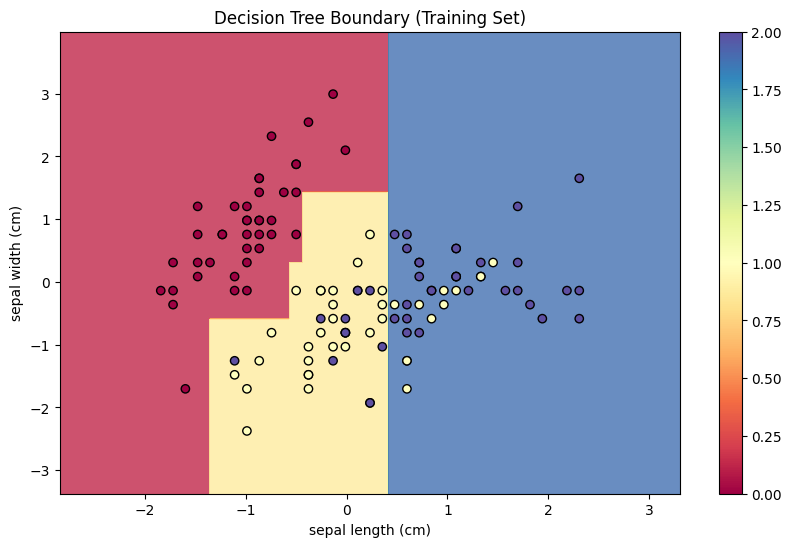

In [14]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, decision_tree, title='Decision Tree Boundary (Training Set)')
plt.show()

# Plot the decision boundary for the testing set


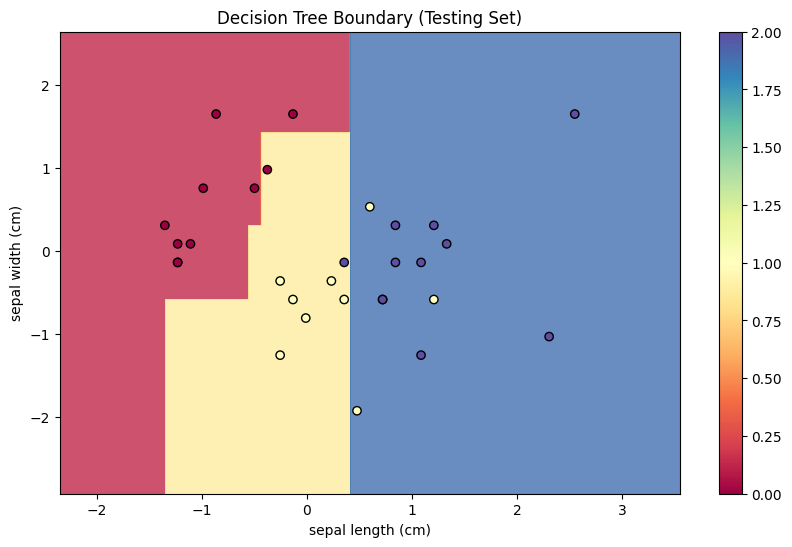

In [15]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, decision_tree, title='Decision Tree Boundary (Testing Set)')
plt.show()

# Plotting the decision tree


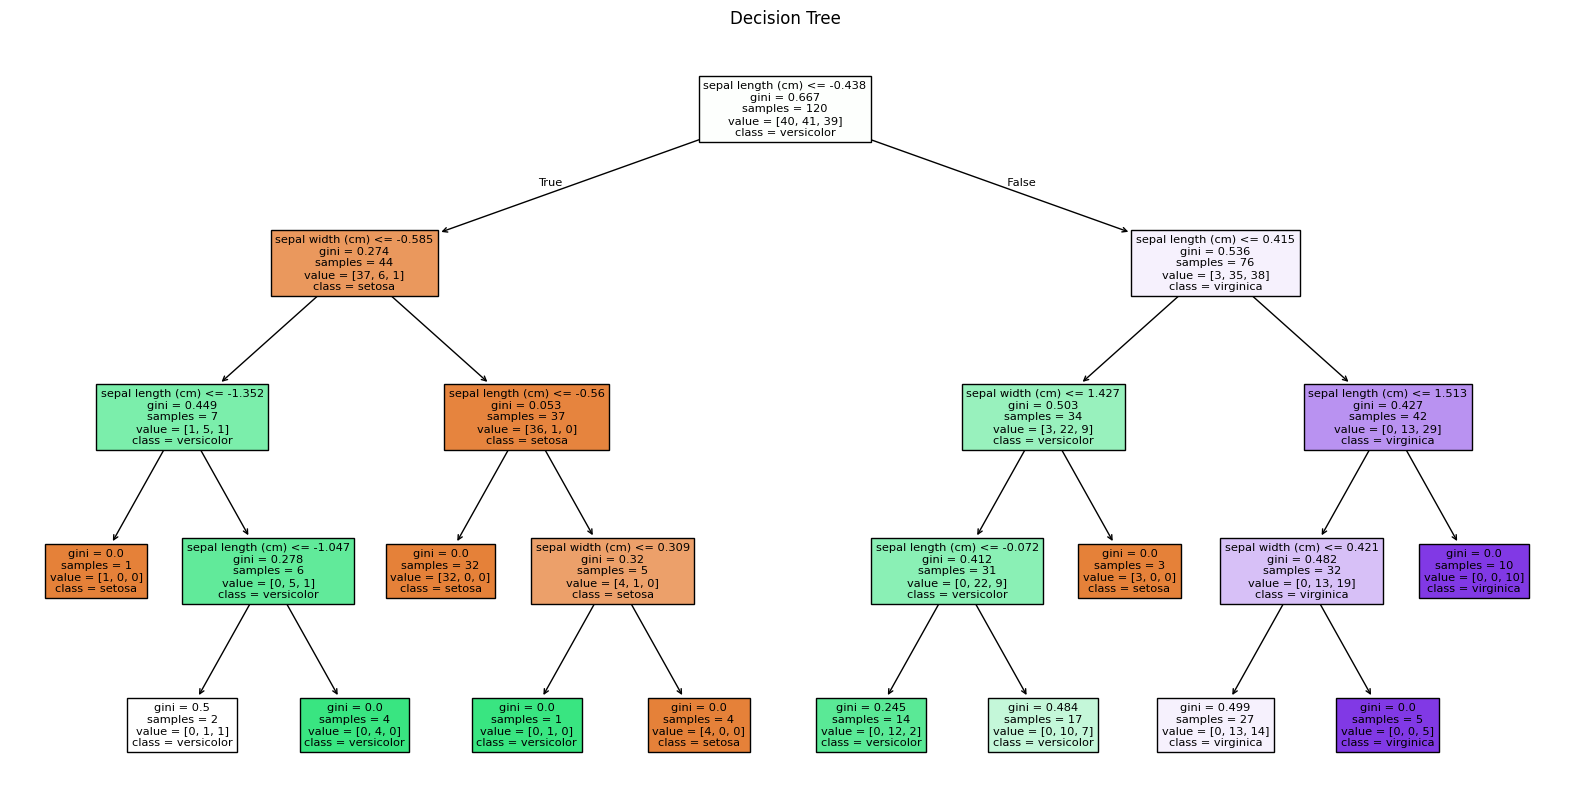

In [16]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=iris.feature_names[:2], class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()